In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
pd.options.display.max_colwidth = 150

# Load in Data

In [6]:
style_variants = pd.read_csv('./style_variant_ids_Womens_Tops.csv')

print style_variants.info()
display(style_variants.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71750 entries, 0 to 71749
Data columns (total 3 columns):
style_variant_id    71750 non-null object
superclass          71750 non-null object
division            71750 non-null object
dtypes: object(3)
memory usage: 1.6+ MB
None


,style_variant_id,superclass,division
0,578d7028f5782bb8170000d6,Tops,Womens
1,578d7046f5782bb8170000ef,Tops,Womens
2,578d704af5782bb8170000f7,Tops,Womens
3,578d704ef5782bb8170000fd,Tops,Womens
4,578d7051f5782bb817000104,Tops,Womens


In [7]:
img_urls = pd.read_csv('./style_variant_images.csv')

print img_urls.info()
display(img_urls.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1607984 entries, 0 to 1607983
Data columns (total 4 columns):
style_variant_id    1607984 non-null object
base_url            1607984 non-null object
photo_url           1607984 non-null object
default             1607984 non-null bool
dtypes: bool(1), object(3)
memory usage: 38.3+ MB
None


,style_variant_id,base_url,photo_url,default
0,57eb0b50f5782baf2b000019,https://res.cloudinary.com/trunk-club/image/upload,/autoimport/store/product/zoom/0/_12941160.jpg,False
1,57eb0b50f5782baf2b000019,https://res.cloudinary.com/trunk-club/image/upload,/autoimport/store/product/zoom/3/_12954423.jpg,True
2,56b06a31899319bdc8000029,https://res.cloudinary.com/trunk-club/image/upload,/autoimport/store/product/zoom/14/_12238854.jpg,False
3,56b06a31899319bdc8000029,https://res.cloudinary.com/trunk-club/image/upload,/autoimport/store/product/zoom/16/_12238856.jpg,True
4,56e7ccdc899319c1e8000032,https://res.cloudinary.com/trunk-club/image/upload,/autoimport/store/product/zoom/13/_12171093.jpg,False


# Format and Merge Data

In [8]:
merged = (
    style_variants
    .loc[:, ['style_variant_id']]
    .merge(img_urls, how='inner', on='style_variant_id')
    .drop_duplicates()
    .query("photo_url != '/missing_photo.jpg'")
    .assign(ext=lambda df: df.photo_url.apply(lambda x: x[-4:]))
    .query("ext != 'jpg)'")
    .assign(base_start_letter=lambda df: df.base_url.apply(lambda x: x[:1]))
    .query("base_start_letter != '/'")
    .assign(url=lambda df: df.base_url + '/h_256,q_80' + df.photo_url)
    )

print merged.info()
display(merged.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212952 entries, 0 to 219070
Data columns (total 7 columns):
style_variant_id     212952 non-null object
base_url             212952 non-null object
photo_url            212952 non-null object
default              212952 non-null bool
ext                  212952 non-null object
base_start_letter    212952 non-null object
url                  212952 non-null object
dtypes: bool(1), object(6)
memory usage: 11.6+ MB
None


,style_variant_id,base_url,photo_url,default,ext,base_start_letter,url
0,578d7028f5782bb8170000d6,https://res.cloudinary.com/trunk-club/image/upload,/autoimport/store/product/zoom/7/_12684147.jpg,False,.jpg,h,"https://res.cloudinary.com/trunk-club/image/upload/h_256,q_80/autoimport/store/product/zoom/7/_12684147.jpg"
1,578d7028f5782bb8170000d6,https://res.cloudinary.com/trunk-club/image/upload,/autoimport/store/product/zoom/14/_12684134.jpg,False,.jpg,h,"https://res.cloudinary.com/trunk-club/image/upload/h_256,q_80/autoimport/store/product/zoom/14/_12684134.jpg"
2,578d7028f5782bb8170000d6,https://res.cloudinary.com/trunk-club/image/upload,/autoimport/store/product/zoom/5/_12684185.jpg,False,.jpg,h,"https://res.cloudinary.com/trunk-club/image/upload/h_256,q_80/autoimport/store/product/zoom/5/_12684185.jpg"
3,578d7028f5782bb8170000d6,https://res.cloudinary.com/trunk-club/image/upload,/autoimport/store/product/zoom/17/_12672677.jpg,False,.jpg,h,"https://res.cloudinary.com/trunk-club/image/upload/h_256,q_80/autoimport/store/product/zoom/17/_12672677.jpg"
4,578d7028f5782bb8170000d6,https://res.cloudinary.com/trunk-club/image/upload,/autoimport/store/product/zoom/19/_12684159.jpg,True,.jpg,h,"https://res.cloudinary.com/trunk-club/image/upload/h_256,q_80/autoimport/store/product/zoom/19/_12684159.jpg"


In [9]:
urls = (
    merged
    .loc[:, ['style_variant_id', 'default', 'url']]
    .sort_values(['style_variant_id', 'default'], ascending=[1,0])
    .groupby('url')
    .head(1)
    .reset_index(drop=True)
)

urls.to_csv('./urls_for_scraping.csv', index=False)

Create dataframe with index=url and name as col

In [2]:
urls = pd.read_csv('./urls_for_scraping.csv')

In [3]:
inds = pd.Series(np.arange(len(urls)), name='name').apply(lambda x: str(x).rjust(6, '0'))

indexed_urls = (
    pd.concat([urls, inds], axis=1)
    .assign(name=lambda df: df.name + '_' +
            df.style_variant_id + '.jpg')
    .set_index('url')
)

In [4]:
indexed_urls.head(2)

,style_variant_id,default,name
url,,,
"https://res.cloudinary.com/trunk-club/image/upload/h_256,q_80/wbxnw1qutnpszbvwzxde.jpg",54492cb4cef4de8c1b00004d,True,000000_54492cb4cef4de8c1b00004d.jpg
"https://res.cloudinary.com/trunk-club/image/upload/h_256,q_80/zywrbly9os6wttnp1paq.jpg",546e6b60cef4de41a1000083,True,000001_546e6b60cef4de41a1000083.jpg


# Download Images

In [14]:
from threading import Thread
from Queue import Queue
import requests
import shutil
import os

In [28]:
%%time

def worker():
    while True:
        url = q.get()
        fn = indexed_urls.loc[url, 'name']
        if not os.path.isfile(path+fn):
            r = requests.get(url, stream=True)
            if r.status_code == 200:
                with open(path+fn, 'wb') as f:
                    shutil.copyfileobj(r.raw, f)
        q.task_done()


path = '/Users/scottcronin/TrunkClub/git_repos/adversarial_networks/imgs/'
q = Queue()

for url in indexed_urls.index.values:
    q.put(url)

for _ in range(25):
    t = Thread(target=worker)
    t.daemon = True
    t.start()

q.join()

CPU times: user 1min 47s, sys: 1min 56s, total: 3min 44s
Wall time: 2min


In [29]:
indexed_urls.shape

(163421, 3)

In [32]:
indexed_urls[indexed_urls.default].shape

(58125, 3)

# Image Processing

In [5]:
# from skimage.transform import resize
# from skimage import transform, util
# from skimage.io import imread, imshow, imsave
# from skimage.util import pad

from skimage import data, draw
from skimage import transform, util, io
from skimage import filters, color
import matplotlib.pyplot as plt


# import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
fn = '/Users/scottcronin/TrunkClub/git_repos/adversarial_networks/imgs/' + indexed_urls.name[0]
im = io.imread(fn)

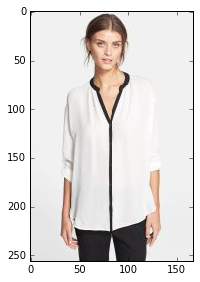

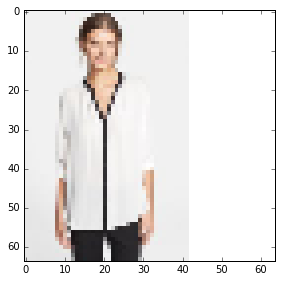

In [7]:
io.imshow(im)
plt.show()

io.imshow(
    transform.resize(util.pad(im, ((0, 0), (0,89), (0,0)),
           mode='constant',
           constant_values=255),
       (64,64)
      ))
plt.show()

In [15]:
img = util.img_as_float(im)
eimg = filters.sobel(color.rgb2gray(img))

In [ ]:
io.imshow(transform.seam_carve(img, eimg, 'vertical', 20))
plt.show()

In [23]:
import skimageage

In [24]:
skimage.__version__

'0.11.3'

In [80]:
%%time
for img_name in indexed_urls[indexed_urls.default].name.values:
    if not os.path.isfile('./imgs_processed_pngs/' + img_name):
        try:
            im = imread('./imgs/' + img_name)
            im2 = resize(pad(im, ((0, 0), (0,89), (0,0)),
                             mode='constant',
                             constant_values=255),
                         (64,64))
            imsave('./imgs_processed_pngs/' + img_name[:-3] + 'png', im2)
        except:
            pass
    

CPU times: user 5min 54s, sys: 23.3 s, total: 6min 18s
Wall time: 10min 47s
